In [0]:

import matplotlib.pyplot as plt
import keras
import re 
import keras
import numpy as np
import pandas as pd 
import os
from nltk.corpus import stopwords
import nltk

import re
import time
import pickle
from nltk.stem import PorterStemmer
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import nltk
import spacy
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
# from gensim.models import KeyedVectors
nltk.download("stopwords")
stop_words = set(stopwords.words('english')) 
nlp = spacy.load('en', disable=['parser', 'ner'])

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Loading data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:




def lemmatization(texts):
    output = []
    j=0
    for i in texts:
        print(j)
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
        j=j+1
    return output
  
def remove_stop(example_sent):    
    filtered_sentence=[]
    word_tokens = word_tokenize(example_sent) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)
  
def clean_text(text):
    return ' '.join(re.sub("(RT|@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",text).split())

In [0]:
# lemmatization(["hi this is doing","fucking"])

# preprocessing the dataset

In [0]:
dataset=pd.read_csv("./data/train.csv")
del dataset["id"]

del dataset["title1_zh"]
del dataset["title2_zh"] 
dataset["title1_en"]=dataset["title1_en"].apply(clean_text).apply(remove_stop)
dataset["title2_en"]=dataset["title2_en"].apply(clean_text).apply(remove_stop)


In [0]:

# convert text to lowercase
dataset['title1_en']= dataset['title1_en'].str.lower()
dataset['title2_en']=dataset['title2_en'].str.lower()

# remove numbers
dataset['title1_en']= dataset['title1_en'].str.replace("[0-9]", " ")
dataset['title2_en'] = dataset['title2_en'].str.replace("[0-9]", " ")

In [0]:
dataset["title1_en"]=lemmatization(dataset["title1_en"])

In [0]:
dataset["title2_en"]=lemmatization(dataset["title2_en"])

# Loading preprocessed data

In [0]:
#already preprocessed data
dataset=pd.read_csv("/content/drive/My Drive/paper works/preprocessedData6000(1).csv")
del dataset["Unnamed: 0"]

In [0]:
dataset.head(20) 
# dataset.to_csv("./data/preprocessedData.csv")


,title,text,label
0,-PRON- can smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE
1,watch the exact moment paul ryan commit politi...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,kerry go paris gesture sympathy,u s secretary state john f kerry say monday st...,REAL
3,bernie supporter twitter erupt anger dnc -PRON...,kaydee king november the lesson tonigh...,FAKE
4,the battle new york why this primary matter,-PRON- primary day new york front runner hilla...,REAL
5,tehran usa,i immigrant grandparent more year ago arri...,FAKE
6,girl horrify at what -PRON- watch boyfriend do...,share this baylee luciani leave screenshot bay...,FAKE
7,britain schindler die,a czech stockbroker save jewish child naz...,REAL
8,fact check trump clinton commander chief forum,hillary clinton donald trump make inaccurate c...,REAL
9,iran reportedly make new push uranium concessi...,iranian negotiator reportedly make last ditch ...,REAL


In [0]:
len(dataset)

6335

In [0]:
dataset.dropna(subset = ['title', 'text', 'label'],inplace=True)

In [0]:

dataset.title =dataset.title .astype(str)
dataset.text_en =dataset.text .astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
len(dataset)

6298

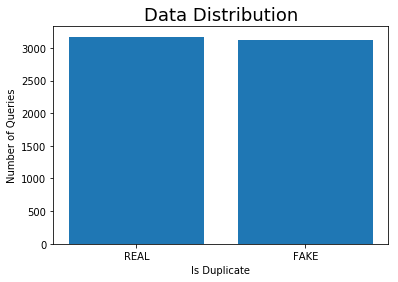


Above Graph Features :  [fake news | not fake news]

Above Graph Indices  :  Index(['REAL', 'FAKE'], dtype='object')

Above Graph Values   :  [3171 3127]


In [0]:

def eda(data):
    dup_check = data['label'].value_counts()
    plt.bar(dup_check.index, dup_check.values)
    plt.ylabel('Number of Queries')
    plt.xlabel('Is Duplicate')
    plt.title('Data Distribution', fontsize = 18)
    plt.show()
    
    print("\nAbove Graph Features :  [fake news | not fake news]\n")
    print("Above Graph Indices  : ", dup_check.index)
    print("\nAbove Graph Values   : ", dup_check.values)

eda(dataset)

In [0]:
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH=20
tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)

In [0]:
corpus_x1 = dataset.title
corpus_x2 = dataset.text
corpus = pd.concat([
    corpus_x1, corpus_x2])
corpus.shape

(12596,)

In [0]:
# corpus

In [0]:
pd.DataFrame(corpus.iloc[:5],
             columns=['title'])

,title
0,-PRON- can smell hillary fear
1,watch the exact moment paul ryan commit politi...
2,kerry go paris gesture sympathy
3,bernie supporter twitter erupt anger dnc -PRON...
4,the battle new york why this primary matter


In [0]:
tokenizer.fit_on_texts(corpus)
X1_train = tokenizer.texts_to_sequences(corpus_x1)
X2_train = tokenizer.texts_to_sequences(corpus_x2)

In [0]:


len(X1_train)

6298

In [0]:
for seq in X2_train[:2]:
    print([tokenizer.index_word[idx] for idx in seq])

['daniel', 'greenfield', 'journalism', 'fellow', 'freedom', 'center', 'new', 'york', 'writer', 'focus', 'radical', 'islam', 'in', 'final', 'stretch', 'election', 'hillary', 'rodham', 'clinton', 'go', 'war', 'fbi', 'the', 'word', 'unprecedented', 'throw', 'around', 'often', 'election', 'ought', 'retire', 'but', 'still', 'unprecedented', 'nominee', 'major', 'political', 'party', 'go', 'war', 'fbi', 'but', 'exactly', 'hillary', 'people', 'do', 'patient', 'wake', 'watch', 'hour', 'cnn', 'hospital', 'bed', 'would', 'assume', 'fbi', 'director', 'jame', 'comey', 'hillary', 'opponent', 'election', 'the', 'fbi', 'attack', 'everyone', 'obama', 'cnn', 'hillary', 'people', 'circulate', 'letter', 'attack', 'comey', 'there', 'currently', 'medium', 'hit', 'piece', 'lambaste', 'target', 'trump', 'pron', 'surprising', 'clinton', 'ally', 'start', 'run', 'attack', 'ad', 'fbi', 'the', 'fbi', 'leadership', 'warn', 'entire', 'left', 'wing', 'establishment', 'form', 'lynch', 'mob', 'continue', 'go', 'hillary

In [0]:
MAX_SEQUENCE_LENGTH = 20
x1_train = keras.preprocessing.sequence.pad_sequences(X1_train, 
                   maxlen=MAX_SEQUENCE_LENGTH)

x2_train = keras.preprocessing.sequence.pad_sequences(X2_train, 
                   maxlen=MAX_SEQUENCE_LENGTH)

In [0]:
# label_to_index = {
#     'unrelated': 0, 
#     'agreed': 1, 
#     'disagreed': 2
# }
label_to_index={
    "REAL":0,
    "FAKE":1
}


In [0]:
y_train = dataset.label.apply(
    lambda x: label_to_index[x])
y_train = np.asarray(y_train).astype('float32')

y_train[:5]

array([1., 1., 0., 1., 0.], dtype=float32)

In [0]:
dataset["label"][:1]

0    FAKE
Name: label, dtype: object

In [0]:
y_train = keras.utils.to_categorical(y_train)
y_train[:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
x2_train.shape

(6298, 20)

In [0]:
x1_train.shape

(6298, 20)

In [0]:
# y_train=y_train.reshape(-1,1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x1_train, x1_val,x2_train, x2_val,y_train, y_val =train_test_split(x1_train,x2_train,y_train,test_size=0.2)
 

In [0]:
x1_train.shape,y_train.shape,x1_val.shape,y_val.shape

((5038, 20), (5038, 2), (1260, 20), (1260, 2))

In [0]:
# !wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [0]:
# from gensim.models import KeyedVectors

In [0]:

# import time
# tic=time.time()
# model=KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin.gz", binary=True)
# toc=time.time()
# print(str((toc-tic)/60)+" mins")

# GLoVE EMBEDDING

In [0]:

tic=time.time()
embeddings_index = {}
f = open('/content/drive/My Drive/paper works/glove.6B.300d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
toc=time.time()
print('Total %s word vectors in Glove 6B 300d.' % len(embeddings_index))
print(str(toc-tic)+" time")


Total 400000 word vectors in Glove 6B 300d.
38.70122146606445 time


In [0]:
# 


In [0]:
word_index=tokenizer.index_word
# word_index

In [0]:
embedding_matrix = np.random.random((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
# word_index

# Simase LSTM

In [0]:
from keras import Input,regularizers
from keras.layers import Embedding,LSTM, concatenate, Dense,regularizers
from keras.models import Model

In [0]:
top_input = Input(
    shape=(MAX_SEQUENCE_LENGTH, ), 
    dtype='int32')
bm_input = Input(
    shape=(MAX_SEQUENCE_LENGTH, ), 
    dtype='int32')


W0826 08:34:43.207332 140374265051008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 08:34:43.250246 140374265051008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [0]:
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
top_embedded = embedding_layer(top_input)
bm_embedded = embedding_layer(bm_input)

W0826 08:34:50.770539 140374265051008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 08:34:50.788404 140374265051008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0826 08:34:50.789448 140374265051008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
shared_lstm = LSTM(128,kernel_regularizer=regularizers.l2(0.01))
top_output = shared_lstm(top_embedded)
bm_output = shared_lstm(bm_embedded)

In [0]:
merged = concatenate([top_output, bm_output],axis=-1)

In [0]:
dense =  Dense(
    units=2, 
    activation='softmax')
predictions = dense(merged)

In [0]:
model = Model(
    inputs=[top_input, bm_input], 
    outputs=predictions)

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 300)      15825000    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 128)          219648      embedding_1[0][0]                
          

In [0]:
from keras.optimizers import Adam
lr = 1e-3
opt = Adam(lr=lr, decay=lr/50)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


W0826 08:35:29.775227 140374265051008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
file=open('/content/drive/My Drive/paper works/saved models/model_lstm.hdf5',"a")

In [0]:

from keras.callbacks import ModelCheckpoint
cp=ModelCheckpoint('/content/drive/My Drive/paper works/saved models/model_lstm.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history = model.fit(
    x=[x1_train, x2_train],y=y_train,batch_size=64,epochs=50,validation_data=([x1_val, x2_val],y_val),
    shuffle=True,callbacks=[cp])

W0826 08:35:38.448079 140374265051008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5038 samples, validate on 1260 samples
Epoch 1/50
5038/5038 [==============================] - 9s 2ms/step - loss: 2.4946 - acc: 0.5859 - val_loss: 1.2633 - val_acc: 0.6873

Epoch 00001: val_acc improved from -inf to 0.68730, saving model to /content/drive/My Drive/paper works/saved models/model_lstm.hdf5
Epoch 2/50
5038/5038 [==============================] - 7s 1ms/step - loss: 0.9758 - acc: 0.6737 - val_loss: 0.8486 - val_acc: 0.6349

Epoch 00002: val_acc did not improve from 0.68730
Epoch 3/50
5038/5038 [==============================] - 8s 2ms/step - loss: 0.7224 - acc: 0.7170 - val_loss: 0.7792 - val_acc: 0.6063

Epoch 00003: val_acc did not improve from 0.68730
Epoch 4/50
5038/5038 [==============================] - 7s 1ms/step - loss: 0.6511 - acc: 0.7295 - val_loss: 0.6898 - val_acc: 0.6754

Epoch 00004: val_acc did not improve from 0.68730
Epoch 5/50
5038/5038 [==============================] - 7s 1ms/step - loss: 0.5900 - acc: 0.7503 - val_loss: 0.6266 - val_acc: 0.

# Results

**ACCURACY LOSS CURVE**

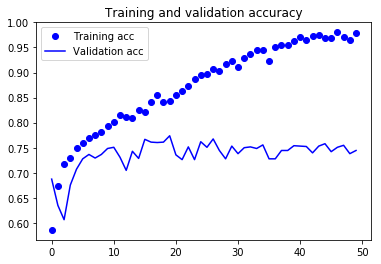

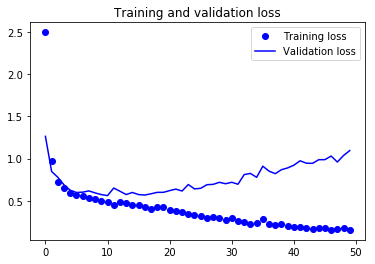

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


**Confusion matrix**

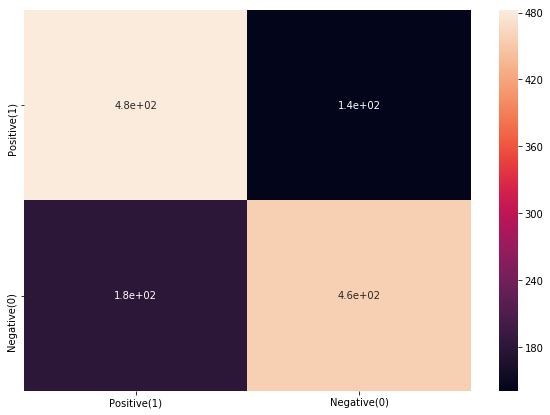

In [0]:
from sklearn import metrics
y_test=model.predict([x1_val,x2_val])
array= metrics.confusion_matrix(y_test.argmax(axis=1), y_val.argmax(axis=1))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(array, index = [i for i in ["Positive(1)","Negative(0)"]],
                  columns = [i for i in ["Positive(1)","Negative(0)"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,)

# Simase CNN

In [0]:
from keras import Input
from keras.layers import Embedding,LSTM, concatenate, Dense,Conv1D,MaxPooling1D,ReLU,Dropout,Flatten
from keras.models import Model

In [0]:
top_input = Input(shape=(MAX_SEQUENCE_LENGTH, ),dtype='int32')
bm_input = Input(shape=(MAX_SEQUENCE_LENGTH, ),dtype='int32')

W0825 21:03:02.107192 140410693695360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 21:03:02.161182 140410693695360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [0]:
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
top_embedded = embedding_layer(top_input)
bm_embedded = embedding_layer(bm_input)

W0825 21:03:13.102530 140410693695360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 21:03:13.123896 140410693695360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0825 21:03:13.126721 140410693695360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:

shared_conv1 = Conv1D(100, kernel_size=3)



In [0]:
top_output = shared_conv1(top_embedded)
relu1 = ReLU()(top_output)
dropout1=Dropout(0.5)(relu1)
max_pool1=MaxPooling1D(pool_size=3)(dropout1)
flatten1=Flatten()(max_pool1)


W0825 21:03:18.333451 140410693695360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0825 21:03:18.350919 140410693695360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
bm_output = shared_conv1(bm_embedded)
relu2= ReLU()(bm_output)
dropout2=Dropout(0.5)(relu2)
max_pool2=MaxPooling1D(pool_size=3)(dropout2)
flatten2=Flatten()(max_pool2)

In [0]:
merged = concatenate([flatten1,flatten2],axis=-1)

In [0]:
dense =  Dense(
    units=2, 
    activation='softmax')
predictions = dense(merged)

In [0]:
model = Model(
    inputs=[top_input, bm_input], 
    outputs=predictions)


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 300)      15825000    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 18, 100)      90100       embedding_1[0][0]                
          

In [0]:
from keras.optimizers import Adam
lr = 1e-3
opt = Adam(lr=lr, decay=lr/50)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


W0825 21:03:33.982140 140410693695360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:

from keras.callbacks import ModelCheckpoint
cp=ModelCheckpoint('/content/drive/My Drive/paper works/saved models/model_cnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history = model.fit(
    x=[x1_train, x2_train],y=y_train,batch_size=64,epochs=50,validation_data=([x1_val, x2_val],y_val),
    shuffle=True,callbacks=[cp])

Train on 5038 samples, validate on 1260 samples
Epoch 1/50
5038/5038 [==============================] - 3s 597us/step - loss: 0.3155 - acc: 0.8624 - val_loss: 0.4524 - val_acc: 0.7810

Epoch 00001: val_acc improved from -inf to 0.78095, saving model to /content/drive/My Drive/paper works/saved models/model_cnn.hdf5
Epoch 2/50
5038/5038 [==============================] - 3s 590us/step - loss: 0.3041 - acc: 0.8654 - val_loss: 0.4184 - val_acc: 0.8048

Epoch 00002: val_acc improved from 0.78095 to 0.80476, saving model to /content/drive/My Drive/paper works/saved models/model_cnn.hdf5
Epoch 3/50
5038/5038 [==============================] - 3s 584us/step - loss: 0.3049 - acc: 0.8652 - val_loss: 0.4341 - val_acc: 0.8008

Epoch 00003: val_acc did not improve from 0.80476
Epoch 4/50
5038/5038 [==============================] - 3s 596us/step - loss: 0.2877 - acc: 0.8805 - val_loss: 0.4288 - val_acc: 0.7976

Epoch 00004: val_acc did not improve from 0.80476
Epoch 5/50
5038/5038 [===============

**ACCURACY - LOSS CURVE**

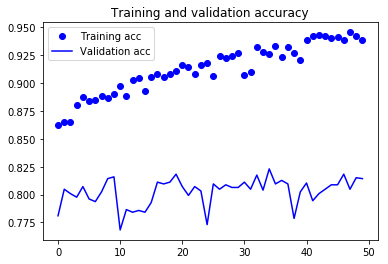

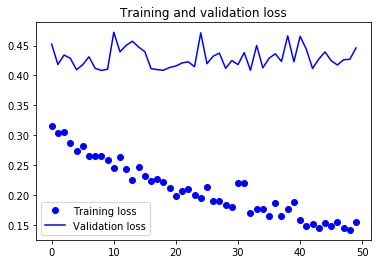

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


**Confusion matrix**

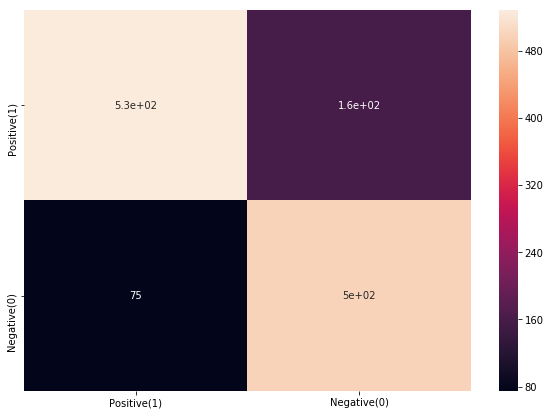

In [0]:
from sklearn import metrics
y_test=model.predict([x1_val,x2_val])
array= metrics.confusion_matrix(y_test.argmax(axis=1), y_val.argmax(axis=1))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(array, index = [i for i in ["Positive(1)","Negative(0)"]],
                  columns = [i for i in ["Positive(1)","Negative(0)"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,)

# Siamse RNN

In [0]:
from keras import Input
from keras.layers import Embedding,SimpleRNN, concatenate, Dense,regularizers
from keras.models import Model

In [0]:
top_input = Input(
    shape=(MAX_SEQUENCE_LENGTH, ), 
    dtype='int32')
bm_input = Input(
    shape=(MAX_SEQUENCE_LENGTH, ), 
    dtype='int32')


In [0]:
embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
top_embedded = embedding_layer(top_input)
bm_embedded = embedding_layer(bm_input)

In [0]:
shared_rnn = SimpleRNN(128,kernel_regularizer=regularizers.l2(0.01))
top_output = shared_rnn(top_embedded)
bm_output = shared_rnn(bm_embedded)

In [0]:
merged = concatenate([top_output, bm_output],axis=-1)

In [0]:
dense =  Dense(
    units=2, 
    activation='softmax')
predictions = dense(merged)

In [0]:
model = Model(
    inputs=[top_input, bm_input], 
    outputs=predictions)

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 20, 300)      15825000    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
simple_rnn_1 (SimpleRNN)        (None, 128)          54912       embedding_2[0][0]                
          

In [0]:
from keras.optimizers import Adam
lr = 1e-3
opt = Adam(lr=lr, decay=lr/50)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [0]:

from keras.callbacks import ModelCheckpoint
cp=ModelCheckpoint('/content/drive/My Drive/paper works/saved models/model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history = model.fit(
    x=[x1_train, x2_train],y=y_train,batch_size=64,epochs=50,validation_data=([x1_val, x2_val],y_val),
    shuffle=True,callbacks=[cp])

Train on 5038 samples, validate on 1260 samples
Epoch 1/50
5038/5038 [==============================] - 3s 661us/step - loss: 2.1142 - acc: 0.5699 - val_loss: 1.6663 - val_acc: 0.6397

Epoch 00001: val_acc improved from -inf to 0.63968, saving model to /content/drive/My Drive/paper works/saved models/model_rnn.hdf5
Epoch 2/50
5038/5038 [==============================] - 3s 530us/step - loss: 1.3781 - acc: 0.6888 - val_loss: 1.1584 - val_acc: 0.6762

Epoch 00002: val_acc improved from 0.63968 to 0.67619, saving model to /content/drive/My Drive/paper works/saved models/model_rnn.hdf5
Epoch 3/50
5038/5038 [==============================] - 3s 524us/step - loss: 0.9843 - acc: 0.7507 - val_loss: 0.9239 - val_acc: 0.7190

Epoch 00003: val_acc improved from 0.67619 to 0.71905, saving model to /content/drive/My Drive/paper works/saved models/model_rnn.hdf5
Epoch 4/50
5038/5038 [==============================] - 3s 531us/step - loss: 0.7797 - acc: 0.7872 - val_loss: 0.8238 - val_acc: 0.7079

Ep

# **Results**

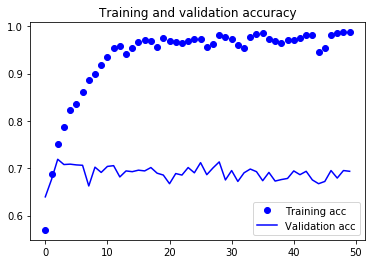

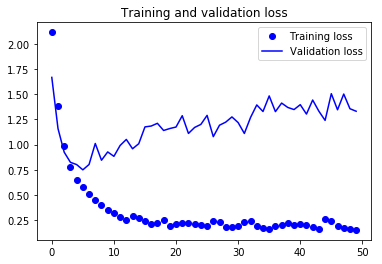

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


**Confusion matrix**

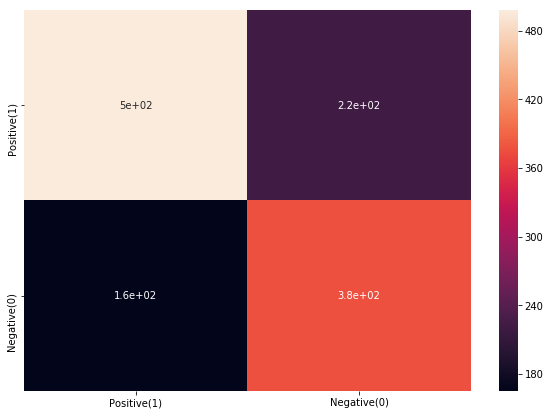

In [0]:
from sklearn import metrics
y_test=model.predict([x1_val,x2_val])
array= metrics.confusion_matrix(y_test.argmax(axis=1), y_val.argmax(axis=1))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(array, index = [i for i in ["Positive(1)","Negative(0)"]],
                  columns = [i for i in ["Positive(1)","Negative(0)"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,)